In [1]:
# Some necessary imports.
import dcgpy
import pygmo as pg
# Sympy is nice to have for basic symbolic manipulation.
from sympy import init_printing
from sympy.parsing.sympy_parser import *
init_printing()
# Fundamental for plotting.
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# We load our data from some available ones shipped with dcgpy.
# In this particular case we use the problem chwirut2 from
# (https://www.itl.nist.gov/div898/strd/nls/data/chwirut2.shtml)
X, Y = dcgpy.generate_chwirut2()

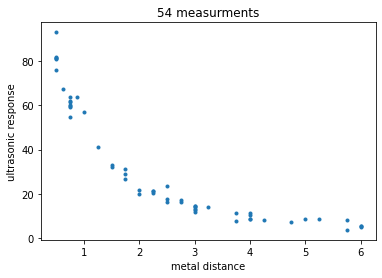

In [3]:
# And we plot them as to visualize the problem.
_ = plt.plot(X, Y, '.')
_ = plt.title('54 measurments')
_ = plt.xlabel('metal distance')
_ = plt.ylabel('ultrasonic response')

In [4]:
# We define our kernel set, that is the mathematical operators we will
# want our final model to possibly contain. What to choose in here is left
# to the competence and knowledge of the user. A list of kernels shipped with dcgpy
# can be found on the online docs. The user can also define its own kernels (see the corresponding tutorial).
ss = dcgpy.kernel_set_double(["sum", "diff", "mul", "pdiv"])

In [5]:
# We instantiate the symbolic regression optimization problem (note: many important options are here not
# specified and thus set to their default values)
udp = dcgpy.symbolic_regression(points = X, labels = Y, kernels=ss())
print(udp)

	Data dimension (points): 1
	Data dimension (labels): 1
	Data size: 54
	Kernels: [sum, diff, mul, pdiv]
	Loss: MSE



In [12]:
# We instantiate here the evolutionary strategy we want to use to search for models.
uda  = dcgpy.es4cgp(gen = 10000, max_mut = 4)

In [13]:
prob = pg.problem(udp)
algo = pg.algorithm(uda)
# Note that the screen output will happen on the terminal, not on your Jupyter notebook.
# It can be recovered afterwards from the log.
algo.set_verbosity(1000)
pop = pg.population(prob, 4)

In [14]:
pop = algo.evolve(pop)

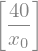

In [15]:
# Lets have a look to the symbolic representation of our model (using sympy)
parse_expr(udp.prettier(pop.champion_x))

In [16]:
# And lets see what our model actually predicts on the inputs
Y_pred = udp.predict(X, pop.champion_x)

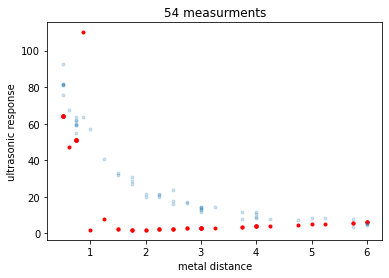

In [11]:
# Lets comapre to the data
_ = plt.plot(X, Y_pred, 'r.')
_ = plt.plot(X, Y, '.', alpha=0.2)
_ = plt.title('54 measurments')
_ = plt.xlabel('metal distance')
_ = plt.ylabel('ultrasonic response')

In [17]:
# Here we get the log of the latest call to the evolve
log = algo.extract(dcgpy.es4cgp).get_log()
gen = [it[0] for it in log]
loss = [it[2] for it in log]

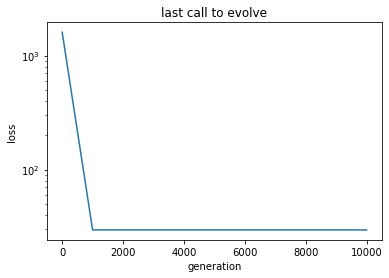

In [18]:
# And here we plot, for example, the generations against the best loss
_ = plt.semilogy(gen, loss)
_ = plt.title('last call to evolve')
_ = plt.xlabel('generation')
_ = plt.ylabel('loss')